# <span style="color:Green">Комментарий от наставника</span>

Привет, меня зовут Дмитрий, наставник в твоей группе. Мои комментарии - <span style="color:DarkGreen">**зеленого**</span> цвета, со временной меткой формата **YYYY-MM-DD**.

---

<span style="color:Green">

**2019-12-04 DD**

Давай разбираться с проектом, со сложностями...

Я посмотрел на твой вопрос, дал попытку дать ответ на него в частных комментариях (см. ниже). Не отчаивайся, дорога - верная, надо просто, идя по ней, откинуть ещё пару-тройку мешающихся камней в сторону. Чуть больше внимания.

**2019-12-07 DD**

Привет. У тебя хороший прогресс, но ещё есть несколько пунктов, которые следует доработать, а то и добавить. Посмотри, пожалуйста, мои новые комментарии. Жду обновлённого проекта!

**2019-12-11 DD**

Проект принимается. Виден рост качества. Так держать!

</span>

# 2019-12-11
# При пересчете и проверке у меня все цифры поехали и выводы не соответствуют данным :( Решил все переписать через функции чтобы каждую ячейку можно было запускать независимо от остальных ячеек и последовательность запуска не влияла на результат. Чтобы было понятно что происходит. Старый код весь оставил, он работает без ошибок(видимых), но его проверять, наверное, не стоит. Весь новый код после вашего последнего комментария в файле, начинается со слов "Тут начинается вторая попытка выполнить проект"

<span style="color:Green">

**2019-12-11 DD**

В принципе, переписать всё заново с учётом уроков - это хорошая практика. Тогда, проверяю после "...вторая попытка..."

</span>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1. Подготовка данных

## Я что-то делаю не так, но не могу понять что, нужна помощь :( Я строю модель логистической регрессии и она выдает f1_score=0. А сразу после масштабирования f1_score=1. Такое вообще бывает? Похоже на какую-то логическую ошибку, но не могу понять где... и дальше двигаться нет смысла :(

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
path = Path.cwd()

df = pd.read_csv('{}/datasets/Churn.csv'.format(path))
print(df.info())
print(df.head())
print(df.describe())


TRAIN_SIZE = 0.6
VALID_SIZE = 0.2
RANDOM_STATE = 12345

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1   

В датасете 10К записей, есть пропуски в поле Tenure. Заполним пропуски 0. Типы полей проставлены верно

<span>

**2019-12-05 DD**
поменял на "-1", ниже написал почему
</span>

In [3]:
df['Tenure'] = df['Tenure'].fillna(-1)
df['Tenure']

0        2
1        1
2        8
3        1
4        2
        ..
9995     5
9996    10
9997     7
9998     3
9999     4
Name: Tenure, Length: 10000, dtype: int64

<span style="color:Green">

**2019-12-04 DD**

Здесь, было бы хорошо привести рассуждения/аргументы, что нам даёт основания на замену пропусков, и почему именно нулём. Необоснованная замена может ещё больше исказить данные (они ещё больше "отойдут" от реальной картины) и результат, чем даже просто удаление пропусков.

</span>

<span>

**2019-12-05 DD**

Да, с 0 наверное я поторопился:( Удалять данные не хочется тк их 10%, это много, но и оставлять так нельзя. Т.к. это категориальная(если мы не хотим суммировать кол-во комнат) переменная, то можно пропуск заполнить новой категорией "-1"
</span>

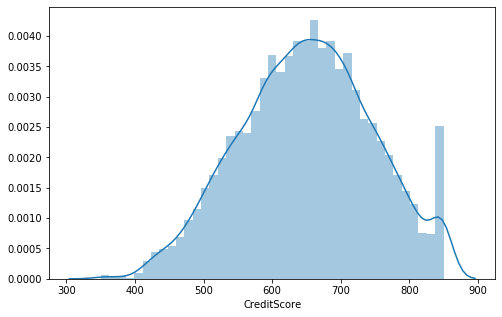

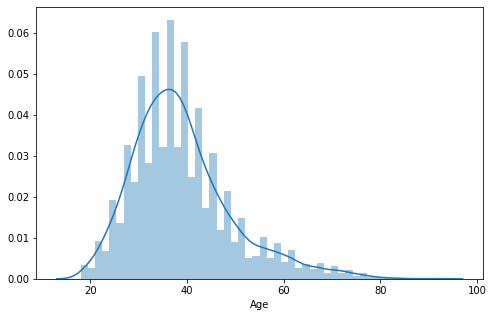

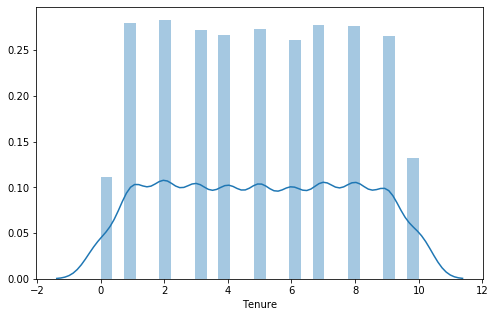

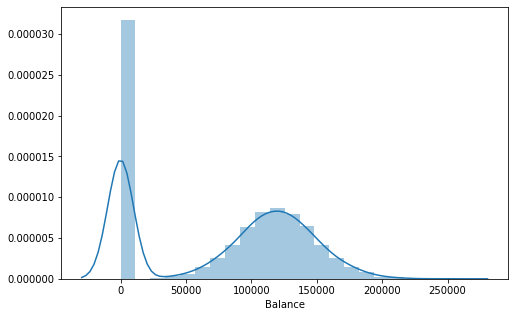

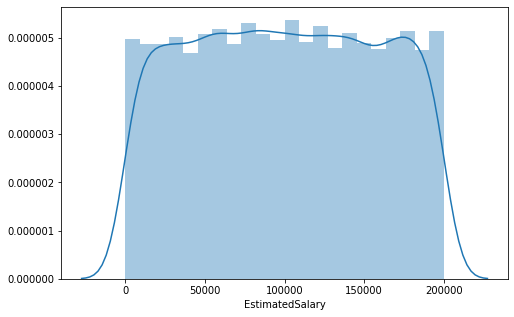

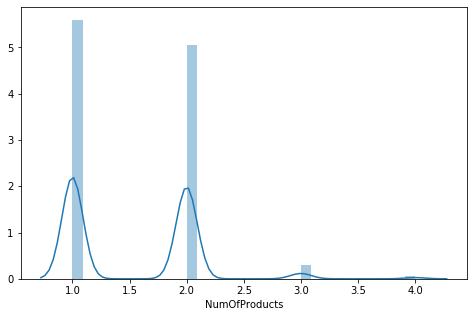

In [4]:
for param in ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']:
    fig, ax = plt.subplots(figsize=(8,5))
    sns.distplot(df[param])

В целом распределения хорошие, что можно отметить:
* Кредитный рейтинг обрывается на 850. Возможно это в принципе максимальное значение
* На удивление кол-во недвижемости распределено равномерно
* У многих на балансе 0

Из describe видно:
* Кредитная карта есть у 70%
* Доля активных клиентов 51%
* Доля ушедших клиентов в выборке 20%

# 2. Исследование задачи

#### Выделим фичи и таргет. Проведем прямое кодирование. Разделим на обучающую, валидационную и тестовую выборки

In [5]:
features = df.drop(['Exited'], axis=1)
target = df['Exited']

def train_valid_test_split(features, target, train_size, valid_size, random_state):  
    features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, train_size=train_size, random_state=random_state)
    valid_size_normalized = valid_size/(1-train_size)
    features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, train_size = valid_size_normalized, random_state=random_state)
    return features_train, features_valid, features_test, target_train, target_valid, target_test

features_ohe = pd.get_dummies(features, drop_first=True)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features_ohe, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)

print(features.shape)
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(10000, 13)
(6000, 2944)
(2000, 2944)
(2000, 2944)


<span style="color:Green">

**2019-12-04 DD**

После OHE очень сильно возросло количество features. Подумай, почему так? Стоит ли слепо "тянуть" в модель все-все исходные признаки? Есть, кстати, неформальное правило: для того, чтобы логистическая регрессия работала необходимо, чтобы на один используемый признак приходилось, как минимум, десяток наблюдений. Для обучения нужны данные. И чем сложнее алгоритм обучения - тем, в общем случае, требуется больше данных.

Также, есть небольшая опечатка: feauteres_valid_test.

</span>

<span>

**2019-12-05 DD**

Да, я ниже до этого дошел :) Хотел сравнить что будет если все тянуть и если убрать Surname <br>
По этой же логике можно убрать RowNumber и CustomerId, на OHE они не влияют, но на модель могут

feauteres_valid_test поправил

</span>

<span style="color:Green">

**2019-12-07 DD**

Верно. RowNumber и CustomerId я тоже бы убрал. Хоть OHE их и не берёт, но алгоритм построения модели всё равно пытается их использовать так или иначе. Чем больше ненужных фич на входе, тем сложнее алгоритму (больше "шума").

</span>

Построим модель логистической регрессии 

In [6]:
model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1 мера:', f1_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))

F1 мера: 0.0
Полнота: 0.0
Точность: 0.0


Все метрики равны 0. Посмотрим матрицу ошибок

In [7]:
print(confusion_matrix(target_valid, predicted_valid))

[[1582    0]
 [ 418    0]]


Модель все время предсказывает что клиент не уйдет. Похоже что модель переобучена, удалим из датасета Surname, RowNumber и CustomerId, маловероятно что target зависит от них

In [8]:
features = df.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
features_ohe = pd.get_dummies(features, drop_first=True)

features_train, features_valid, features_test, target_train, target_valid, target_test = \
train_valid_test_split(features_ohe, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)

model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1 мера:', f1_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))

F1 мера: 0.08385744234800838
Полнота: 0.04784688995215311
Точность: 0.3389830508474576


Ничего не изменилось. Попробуем отмасштабировать фичи

In [9]:
features_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [10]:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male']
scaler.fit(features_train[numeric])
features_train_scalar = features_train.copy()
features_train_scalar.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid_scalar = features_valid.copy()
features_valid_scalar.loc[:, numeric] = scaler.transform(features_valid[numeric])

model.fit(features_train_scalar, target_train)
predicted_valid = model.predict(features_valid_scalar)
print('F1 мера:', f1_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))

F1 мера: 0.3344594594594595
Полнота: 0.23684210526315788
Точность: 0.5689655172413793


In [11]:
print(confusion_matrix(target_valid, predicted_valid))

[[1507   75]
 [ 319   99]]


Масштабирование явно помогло: F1 возросло с 0.08 до 0.33

<span style="color:Green">

**2019-12-04 DD**

В принципе, ты идёшь по верному пути (убрать лишние признаки, нормировать данные). Надо ещё раз посмотреть на признаки, выкинуть лишние, тогда LR должна заработать.

Модель у тебя получилась "идеальной", потому что на features_ohe ты формируешь от df... Подумай, чего такого ты мог взять из df, что модель у тебя отличилась 100% попаданием?

</span>

<span>

**2019-12-06 DD**

Теперь я точно знаю что если модели оставить правильный ответ, то она очень хорошо работает

</span>

<span style="color:Green">

**2019-12-07 DD**

Хорошо, что Exited уже не вошло в список признаков для обучения. Вопрос: стоит ли пытаться нормализовать такие бинарные признаки, как HasCrCard, IsActiveMember, Gender_Male и т.п.? Что даёт их нормализация? Если их не нормализовать, то как изменится качество модели? Попробуй провести этот эксперимент. Это важно, т.к. автоматическое включение бинарных признаков в нормализацию (без пояснений) косвенно указывает на то, что ты, возможно, до конца не понимаешь для чего выполняется нормализация.

</span>

Мои рассуждения: Есть признаки которые меняются сильно, например Balance и EstimatedSalary. Есть признаки которые меняются средне: CreditScore, Age. И есть признаки которые меняются слабо, это все остальные поля. Но все признаки одинаково важны и чтобы модель их воспринимала равнозначно мы и проводим нормализацию.<br>
Сейчас перечитал ещё раз обучающий блок, для нормализации необходимо чтобы величина была распределена нормально и бинарные распределения Geography_Germany, Geography_Spain, Gender_Male, IsActiveMember, HasCrCard для нормализации не подходят. Age и CreditScore однозначно можно нормализовать. Для Balance есть выброс в районе 0, возможно его(выброс) не стоит учитывать при нормализации? И есть NumOfProducts, Tenure и EstimatedSalary у которых распределение равномерное

Проведем два эксперимента:
1. Масштабирование Age, CreditScore, Balance
2. Масштабирование Age, CreditScore, Balance, NumOfProducts, Tenure и EstimatedSalary

За ориентир возьмем значение F1=0.33 при масштабировании всего<br>
#### Эксперимент1

In [12]:
features = df.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
features_ohe = pd.get_dummies(features, drop_first=True)

features_train, features_valid, features_test, target_train, target_valid, target_test = \
train_valid_test_split(features_ohe, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)

scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Balance']
scaler.fit(features_train[numeric])
features_train_scalar = features_train.copy()
features_train_scalar.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid_scalar = features_valid.copy()
features_valid_scalar.loc[:, numeric] = scaler.transform(features_valid[numeric])

model.fit(features_train_scalar, target_train)
predicted_valid = model.predict(features_valid_scalar)
print('F1 мера:', f1_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))

F1 мера: 0.0
Полнота: 0.0
Точность: 0.0


Эксперимент2

In [13]:
features = df.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
features_ohe = pd.get_dummies(features, drop_first=True)

features_train, features_valid, features_test, target_train, target_valid, target_test = \
train_valid_test_split(features_ohe, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)

scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])
features_train_scalar = features_train.copy()
features_train_scalar.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid_scalar = features_valid.copy()
features_valid_scalar.loc[:, numeric] = scaler.transform(features_valid[numeric])

model.fit(features_train_scalar, target_train)
predicted_valid = model.predict(features_valid_scalar)
print('F1 мера:', f1_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))

F1 мера: 0.33389544688026984
Полнота: 0.23684210526315788
Точность: 0.5657142857142857


При масштабировании только части признаков: 'CreditScore', 'Age', 'Balance' модель ломается и предсказать ничего не может. При масштибировании 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary' F1  мера возрастает с 0.3311 до 0.3339, не прорыв, но лучше

# 3. Борьба с дисбалансом

Попробуем взвесить классы

In [14]:
features = df.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
features_ohe = pd.get_dummies(features, drop_first=True)

features_train, features_valid, features_test, target_train, target_valid, target_test = \
train_valid_test_split(features_ohe, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)

scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])
features_train_scalar = features_train.copy()
features_train_scalar.loc[:, numeric] = scaler.transform(features_train[numeric])
features_valid_scalar = features_valid.copy()
features_valid_scalar.loc[:, numeric] = scaler.transform(features_valid[numeric])

model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, class_weight='balanced')
model.fit(features_train_scalar, target_train)
predicted_valid = model.predict(features_valid_scalar)
print('F1 мера:', f1_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))


F1 мера: 0.48676345004269855
Полнота: 0.6818181818181818
Точность: 0.3784860557768924


Взвешивание работает! Попробуем upsampling. Мы уже знаем что доля ушедших клиентов в выборке составляет 20%. Чтобы она сравнялась с долей неушедших надо её увеличить в 4 раза. Используем функцию из тренажера

In [15]:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled_train, target_upsampled_train = upsample(features_train_scalar, target_train, 4)

model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, class_weight='balanced')
model.fit(features_upsampled_train, target_upsampled_train)

predicted_valid = model.predict(features_valid)

print('F1 мера:', f1_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))

F1 мера: 0.34602649006622516
Полнота: 1.0
Точность: 0.2092092092092092


In [16]:
print(confusion_matrix(target_valid, predicted_valid))

[[   2 1580]
 [   0  418]]


После upsampling полнота подскочила до 1, но точность упала до 0.2. F1 тоже упала, попробуем downsampling

In [17]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    
    return features_downsampled, target_downsampled

features_downsampled_train, target_downsampled_train = downsample(features_train_scalar, target_train, 0.25)
model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, class_weight='balanced')
model.fit(features_downsampled_train, target_downsampled_train)
predicted_valid = model.predict(features_valid)
print('F1 мера:', f1_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))

F1 мера: 0.3458833264377327
Полнота: 1.0
Точность: 0.20910455227613806


Downsampling тоже не помог :(

Последняя надежда на изменение порога

In [18]:
model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, class_weight='balanced')
model.fit(features_train_scalar, target_train)
predicted_valid = model.predict(features_valid_scalar)
print('До подбора порога:')
print('F1 мера:', f1_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))



probabilities_valid = model.predict_proba(features_valid_scalar)
probabilities_one_valid = probabilities_valid[:, 1]
print('Рузультаты подбора порога:')
for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))


До подбора порога:
F1 мера: 0.48676345004269855
Полнота: 0.6818181818181818
Точность: 0.3784860557768924
Рузультаты подбора порога:
Порог = 0.00 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.02 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.04 | Точность = 0.209, Полнота = 1.000, F1-мера = 0.346
Порог = 0.06 | Точность = 0.210, Полнота = 1.000, F1-мера = 0.347
Порог = 0.08 | Точность = 0.212, Полнота = 1.000, F1-мера = 0.350
Порог = 0.10 | Точность = 0.216, Полнота = 1.000, F1-мера = 0.355
Порог = 0.12 | Точность = 0.219, Полнота = 0.995, F1-мера = 0.359
Порог = 0.14 | Точность = 0.225, Полнота = 0.990, F1-мера = 0.367
Порог = 0.16 | Точность = 0.231, Полнота = 0.988, F1-мера = 0.374
Порог = 0.18 | Точность = 0.236, Полнота = 0.978, F1-мера = 0.380
Порог = 0.20 | Точность = 0.242, Полнота = 0.969, F1-мера = 0.387
Порог = 0.22 | Точность = 0.251, Полнота = 0.957, F1-мера = 0.397
Порог = 0.24 | Точность = 0.255, Полнота = 0.940, F1-мера = 0.401
Порог = 0.

Максимальное значение F1=0.500 достигается при пороге 0.62<br>
Значение 0.500 ниже целевого, но есть более точные модели, попробуем RandomForest!

### 2019-12-09 - Для начала подберем гиперпараметры для RandomForest

In [19]:
for n_estimators in range(5, 100, 5):
    for min_samples_split in range(2, 10 ,1):
        model = RandomForestClassifier(n_estimators=n_estimators, min_samples_split = min_samples_split, random_state=RANDOM_STATE, class_weight='balanced')
        model.fit(features_train_scalar, target_train)
        predicted_valid = model.predict(features_valid_scalar)

        print('n_estimators:', n_estimators, 'min_samples_split:',min_samples_split, 'F1 мера:', f1_score(target_valid, predicted_valid))




n_estimators: 5 min_samples_split: 2 F1 мера: 0.5502063273727648
n_estimators: 5 min_samples_split: 3 F1 мера: 0.5741239892183289
n_estimators: 5 min_samples_split: 4 F1 мера: 0.5584415584415584
n_estimators: 5 min_samples_split: 5 F1 мера: 0.5831134564643801
n_estimators: 5 min_samples_split: 6 F1 мера: 0.5674653215636822
n_estimators: 5 min_samples_split: 7 F1 мера: 0.5767326732673267
n_estimators: 5 min_samples_split: 8 F1 мера: 0.5776081424936388
n_estimators: 5 min_samples_split: 9 F1 мера: 0.5850000000000001
n_estimators: 10 min_samples_split: 2 F1 мера: 0.5547226386806596
n_estimators: 10 min_samples_split: 3 F1 мера: 0.567251461988304
n_estimators: 10 min_samples_split: 4 F1 мера: 0.5902097902097903
n_estimators: 10 min_samples_split: 5 F1 мера: 0.5898491083676269
n_estimators: 10 min_samples_split: 6 F1 мера: 0.5781865965834428
n_estimators: 10 min_samples_split: 7 F1 мера: 0.5923076923076923
n_estimators: 10 min_samples_split: 8 F1 мера: 0.6020671834625323
n_estimators: 10 mi

### 2019-12-09 -  Лучший результат достигается при n_estimators=40, min_samples_split=9

In [20]:
model = RandomForestClassifier(n_estimators=40, min_samples_split=9, random_state=RANDOM_STATE, class_weight='balanced')
model.fit(features_train_scalar, target_train)


predicted_valid = model.predict(features_valid_scalar)

print('F1 мера:', f1_score(target_valid, predicted_valid))
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))



probabilities_valid = model.predict_proba(features_valid_scalar)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 1, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))



F1 мера: 0.6098191214470283
Полнота: 0.5645933014354066
Точность: 0.6629213483146067
Порог = 0.00 | Точность = 0.216, Полнота = 0.995, F1-мера = 0.355
Порог = 0.02 | Точность = 0.226, Полнота = 0.990, F1-мера = 0.368
Порог = 0.04 | Точность = 0.238, Полнота = 0.978, F1-мера = 0.383
Порог = 0.06 | Точность = 0.248, Полнота = 0.957, F1-мера = 0.394
Порог = 0.08 | Точность = 0.263, Полнота = 0.947, F1-мера = 0.411
Порог = 0.10 | Точность = 0.277, Полнота = 0.928, F1-мера = 0.426
Порог = 0.12 | Точность = 0.296, Полнота = 0.921, F1-мера = 0.448
Порог = 0.14 | Точность = 0.311, Полнота = 0.904, F1-мера = 0.463
Порог = 0.16 | Точность = 0.325, Полнота = 0.883, F1-мера = 0.476
Порог = 0.18 | Точность = 0.338, Полнота = 0.868, F1-мера = 0.487
Порог = 0.20 | Точность = 0.359, Полнота = 0.856, F1-мера = 0.506
Порог = 0.22 | Точность = 0.379, Полнота = 0.835, F1-мера = 0.522
Порог = 0.24 | Точность = 0.401, Полнота = 0.823, F1-мера = 0.539
Порог = 0.26 | Точность = 0.420, Полнота = 0.797, F1-мера

УРА! при пороге 0.32 F1=0.615, выше целевого показателя. Итак, для получения этого результата нам пришлось отбросить модель логистической регрессии и выбрать модель случайного леса. Произвести взвешивание классов, провести OHE-преобразование, масштабирование фичей и изменить порог принятия решения<br>
Проделаем это ещё раз для тестовой выборки
### 2019-12-09 - После подбора гиперпараметров наибольшее значение F1=0.676 достигается при том же пороге 0.32

Посчитаем AUC-ROC

In [21]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8412909284474258


0.82 > 0.5 Наша модель работает сильно лучше случайной :)
### 2019-12-09 - AUC-ROC возрасла до 0.85

<span style="color:Green">

**2019-12-07 DD**

Хороший результат, и хороший приём с нащупыванием порога срабатывания. 

Что выше упущено:
- модель с DecisionTreeClassifier не рассматривается, следует добавить,
- для модели с RandomForestClassifier ты сразу же выбрал какие-то параметры (n_estimators=20), но попробуй подобрать их. Надо же как-то показать, что именно 20 будет наиболее оптимальным параметром (или нет).
- попробуй метод upsample/downsample с DT и RF, вдруг они сработают?

</span>

# Тут начинается вторая попытка выполнить проект

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

TRAIN_SIZE = 0.6
VALID_SIZE = 0.2
RANDOM_STATE = 12345

# Открываем файл и делим на фичи/таргет
def preparing(filename):
    df = pd.read_csv(filename)
    df['Tenure'] = df['Tenure'].fillna(-1)
    features = df.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
    target = df['Exited']
    return features, target

# Делаем OHE преобразование  
def oheing(features):
    features_ohe = pd.get_dummies(features, drop_first=True)
    return features_ohe

# Делим выборку на тренировочную, валидационную и тестовую
def train_valid_test_split(features, target, train_size, valid_size, random_state):  
    features_train, features_valid_test, target_train, target_valid_test = train_test_split(features, target, train_size=train_size, random_state=random_state)
    valid_size_normalized = valid_size/(1-train_size)
    features_valid, features_test, target_valid, target_test = train_test_split(features_valid_test, target_valid_test, train_size = valid_size_normalized, random_state=random_state)
    return features_train, features_valid, features_test, target_train, target_valid, target_test

# Масштабируем признаки
def scaling(features_train, features_valid, numeric):
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train_scalar = features_train.copy()
    features_train_scalar.loc[:, numeric] = scaler.transform(features_train[numeric])
    features_valid_scalar = features_valid.copy()
    features_valid_scalar.loc[:, numeric] = scaler.transform(features_valid[numeric])
    return features_train_scalar, features_valid_scalar

# Проводим upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    return features_upsampled, target_upsampled

# Проводим downsampling
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=RANDOM_STATE)
    return features_downsampled, target_downsampled

# Модель LR
def lr(features_train, target_train, features_valid, class_weight):
    model = LogisticRegression(solver='liblinear', random_state=RANDOM_STATE, class_weight=class_weight)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    return model, predicted_valid

# Модель DT
def dt(features_train, target_train, features_valid, class_weight, max_depth):
    model = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight=class_weight, max_depth=max_depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    return model, predicted_valid

# Модель DT, поиск оптимального max_depth
def dt_best_max_depth(features_train, target_train, features_valid, target_valid, class_weight, maх_depth_list):
    max_f1 = 0
    max_max_depth = 0
    for max_depth in maх_depth_list:
        model = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight=class_weight, max_depth=max_depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1>max_f1:
            max_f1 = f1
            max_max_depth = max_depth
    return max_max_depth

# Модель RF
def rf(features_train, target_train, features_valid, class_weight, n_estimators):
    model = RandomForestClassifier(random_state=RANDOM_STATE, class_weight=class_weight, n_estimators=n_estimators)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    return model, predicted_valid

# Модель RF, поиск оптимального max_depth
def rf_best_n_estimators(features_train, target_train, features_valid, target_valid, class_weight, n_estimators_list):
    max_f1 = 0
    max_n_estimators = 0
    for n_estimators in n_estimators_list:
        model = RandomForestClassifier(random_state=RANDOM_STATE, class_weight=class_weight, n_estimators=n_estimators)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predicted_valid)
        if f1>max_f1:
            max_f1 = f1
            max_n_estimators = n_estimators
    return max_n_estimators

# Выбираем лучший порог
def get_best_threshold(threshold_list, probabilities_one_valid, target_valid):
    f1_max = 0
    threshold_max = 0.5
    for threshold in threshold_list:
        predicted_valid = probabilities_one_valid > threshold
        f1 = f1_score(target_valid, predicted_valid)
        if(f1>f1_max):
            f1_max = f1
            threshold_max = threshold
    return threshold_max

# Вывод метрик
def print_scores(target, predicted):
    print('    F1 мера: {:.3f}, Полнота: {:.2f}, Точность: {:.2f}'.format(f1_score(target, predicted), 
                                                                          recall_score(target, predicted), 
                                                                          precision_score(target, predicted)
                                                                          ))
        
    

<span style="color:Green">

**2019-12-11 DD**

Отличные получились логические блоки. На таких функциях потом получается хорошо читаемый код.

</span>

Заново постром модель логистической регрессии

In [46]:
print('Модель: LR; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\нет; Масштабирование: все признаки;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)

features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male'])

model, predicted_valid = lr(features_train, target_train, features_valid, [])

print_scores(target_valid, predicted_valid)

Модель: LR; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\нет; Масштабирование: все признаки;
    F1 мера: 0.334, Полнота: 0.24, Точность: 0.57


In [48]:
print('Модель: LR; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)

features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = lr(features_train, target_train, features_valid, [])

print_scores(target_valid, predicted_valid)

Модель: LR; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\нет; Масштабирование: без булевых;
    F1 мера: 0.334, Полнота: 0.24, Точность: 0.57


##### Масштабирование без булевых работает лучше. Дальше везде будем делать так
Проверим upsampling\downsampling, взвешивание классов и их комбинации

In [50]:
print('Модель: LR; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = upsample(features_train, target_train, 4)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = lr(features_train, target_train, features_valid, [])

print_scores(target_valid, predicted_valid)

Модель: LR; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;
    F1 мера: 0.485, Полнота: 0.68, Точность: 0.38


In [52]:
print('Модель: LR; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = downsample(features_train, target_train, 0.25)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = lr(features_train, target_train, features_valid, [])

print_scores(target_valid, predicted_valid)

Модель: LR; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;
    F1 мера: 0.480, Полнота: 0.66, Точность: 0.38


In [53]:
print('Модель: LR; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = lr(features_train, target_train, features_valid, 'balanced')

print_scores(target_valid, predicted_valid)

Модель: LR; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\нет; Масштабирование: без булевых;
    F1 мера: 0.487, Полнота: 0.68, Точность: 0.38


In [54]:
print('Модель: LR; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = upsample(features_train, target_train, 4)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = lr(features_train, target_train, features_valid, 'balanced')

print_scores(target_valid, predicted_valid)

Модель: LR; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;
    F1 мера: 0.487, Полнота: 0.68, Точность: 0.38


In [55]:
print('Модель: LR; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = downsample(features_train, target_train, 0.25)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = lr(features_train, target_train, features_valid, 'balanced')

print_scores(target_valid, predicted_valid)

Модель: LR; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;
    F1 мера: 0.480, Полнота: 0.67, Точность: 0.38


##### Все три способа работают и результаты практически одинаковые. Лучше всех сработал downsampling(f1=0.49). Совместное использование downsampling\upsampling  с взвешиванием классов плюсов не даёт
Дальше будем делать только downsampling. Попробуем применить изменение порога

In [56]:
print('Модель: LR; Изменение порога: да; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = downsample(features_train, target_train, 0.25)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = lr(features_train, target_train, features_valid, [])

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

threshold = get_best_threshold(np.arange(0, 1, 0.02), probabilities_one_valid, target_valid)
predicted_valid = probabilities_one_valid > threshold
print('    Значение threshold: {}'.format(threshold))

print_scores(target_valid, predicted_valid)

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('    Значение AUC-ROC: {:.2f}'.format(auc_roc))

Модель: LR; Изменение порога: да; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;
    Значение threshold: 0.58
    F1 мера: 0.501, Полнота: 0.60, Точность: 0.43
    Значение AUC-ROC: 0.76


#### Максимальное значение точности f1=0.496 достигается при пороге 0.58. Это максимальное значение которого удалось достичь с помощью LR
### Переходим к  DT
Проверим upsampling\downsampling, взвешивание классов и их комбинации

In [57]:
print('Модель: DT; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = upsample(features_train, target_train, 4)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = dt(features_train, target_train, features_valid, [], None)

print_scores(target_valid, predicted_valid)

Модель: DT; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;
    F1 мера: 0.498, Полнота: 0.49, Точность: 0.51


In [58]:
print('Модель: DT; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = downsample(features_train, target_train, 0.25)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = dt(features_train, target_train, features_valid, [], None)

print_scores(target_valid, predicted_valid)

Модель: DT; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;
    F1 мера: 0.491, Полнота: 0.70, Точность: 0.38


In [59]:
print('Модель: DT; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = dt(features_train, target_train, features_valid, 'balanced', None)

print_scores(target_valid, predicted_valid)

Модель: DT; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\нет; Масштабирование: без булевых;
    F1 мера: 0.486, Полнота: 0.47, Точность: 0.50


In [60]:
print('Модель: DT; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = upsample(features_train, target_train, 4)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = dt(features_train, target_train, features_valid, 'balanced', None)

print_scores(target_valid, predicted_valid)

Модель: DT; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;
    F1 мера: 0.491, Полнота: 0.48, Точность: 0.50


In [61]:
print('Модель: DT; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = downsample(features_train, target_train, 0.25)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = dt(features_train, target_train, features_valid, 'balanced', None)

print_scores(target_valid, predicted_valid)

Модель: DT; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;
    F1 мера: 0.489, Полнота: 0.71, Точность: 0.37


##### Все три способа работают. Лучше всех сработал downsampling(f1=0.501). Совместное использование downsampling\upsampling  с взвешиванием классов плюсов не даёт
Дальше будем делать только downsampling. Попробуем подобрать гиперпараметры

In [62]:
print('Модель: DT с подбором max_depth; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = downsample(features_train, target_train, 0.25)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

max_depth = dt_best_max_depth(features_train, target_train, features_valid, target_valid, [], range(1, 20, 1))
print('    Значение max_depth: {}'.format(max_depth))
model, predicted_valid = dt(features_train, target_train, features_valid, [], max_depth)

print_scores(target_valid, predicted_valid)

Модель: DT с подбором max_depth; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;
    Значение max_depth: 5
    F1 мера: 0.595, Полнота: 0.70, Точность: 0.52


##### Удалось перевалить за пороговое значение.  Попробуем изменить порог

In [63]:
print('Модель: DT с подбором max_depth; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = downsample(features_train, target_train, 0.25)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

max_depth = dt_best_max_depth(features_train, target_train, features_valid, target_valid, [], range(1, 20, 1))
print('    Значение max_depth: {}'.format(max_depth))
model, predicted_valid = dt(features_train, target_train, features_valid, [], max_depth)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

threshold = get_best_threshold(np.arange(0, 1, 0.02), probabilities_one_valid, target_valid)
print('    Значение threshold: {}'.format(threshold))
predicted_valid = probabilities_one_valid > threshold

print_scores(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('    Значение AUC-ROC: {:.2f}'.format(auc_roc))

Модель: DT с подбором max_depth; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;
    Значение max_depth: 5
    Значение threshold: 0.62
    F1 мера: 0.612, Полнота: 0.61, Точность: 0.61
    Значение AUC-ROC: 0.82


##### Максимальное значение f1=0.612 для модели DT достигается при max_depth=5, threshold=0.62. Модель DT работает ожидаемо лучше чем LR
### Переходим к RandomForest
Проверим upsampling\downsampling, взвешивание классов и их комбинации

In [64]:
print('Модель: RF; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = upsample(features_train, target_train, 4)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = rf(features_train, target_train, features_valid, [], 100)

print_scores(target_valid, predicted_valid)

Модель: RF; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;
    F1 мера: 0.617, Полнота: 0.56, Точность: 0.69


In [65]:
print('Модель: RF; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = downsample(features_train, target_train, 0.25)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = rf(features_train, target_train, features_valid, [], 100)

print_scores(target_valid, predicted_valid)

Модель: RF; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;
    F1 мера: 0.580, Полнота: 0.73, Точность: 0.48


In [67]:
print('Модель: RF; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = rf(features_train, target_train, features_valid, 'balanced', 100)

print_scores(target_valid, predicted_valid)

Модель: RF; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\нет; Масштабирование: без булевых;
    F1 мера: 0.565, Полнота: 0.44, Точность: 0.80


In [68]:
print('Модель: RF; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = upsample(features_train, target_train, 4)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = rf(features_train, target_train, features_valid, 'balanced', 100)

print_scores(target_valid, predicted_valid)

Модель: RF; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;
    F1 мера: 0.607, Полнота: 0.55, Точность: 0.67


In [69]:
print('Модель: RF; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = downsample(features_train, target_train, 0.25)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = rf(features_train, target_train, features_valid, 'balanced', 100)

print_scores(target_valid, predicted_valid)

Модель: RF; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;
    F1 мера: 0.584, Полнота: 0.76, Точность: 0.48


##### Все три способа работают. Лучше всех сработало взвешивание классов с upsampling(f1=0.6). Сразу превышаем порог
Дальше будем делать только взвешивание с upsampling. Попробуем подобрать гиперпараметры

In [70]:
print('Модель: RF с подбором n_estimators; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = upsample(features_train, target_train, 4)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

n_estimators = rf_best_n_estimators(features_train, target_train, features_valid, target_valid, 'balanced', range(70, 120, 5))
print('    Значение n_estimators: {}'.format(n_estimators))
model, predicted_valid = rf(features_train, target_train, features_valid, 'balanced', n_estimators)

print_scores(target_valid, predicted_valid)

Модель: RF с подбором n_estimators; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;
    Значение n_estimators: 105
    F1 мера: 0.613, Полнота: 0.56, Точность: 0.67


##### Далее будем использовать значение n_estimators = 95. Попробуем изменить порог

In [71]:
print('Модель: RF с подбором n_estimators; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train, target_train = upsample(features_train, target_train, 4)
features_train, features_valid = scaling(features_train, features_valid, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

model, predicted_valid = rf(features_train, target_train, features_valid, 'balanced', 95)
print('    Значение n_estimators: {}'.format(95))

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

threshold = get_best_threshold(np.arange(0, 1, 0.05), probabilities_one_valid, target_valid)
print('    Значение threshold: {}'.format(threshold))
predicted_valid = probabilities_one_valid > threshold

print_scores(target_valid, predicted_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('    Значение AUC-ROC: {:.2f}'.format(auc_roc))

Модель: RF с подбором n_estimators; Изменение порога: нет; Взвешивание классов: да; Upsampling\Downsampling: да\нет; Масштабирование: без булевых;
    Значение n_estimators: 95
    Значение threshold: 0.45
    F1 мера: 0.619, Полнота: 0.61, Точность: 0.63
    Значение AUC-ROC: 0.84


##### Максимальное значение f1=0.611 для модели RF достигается при n_estimators=95, threshold=0.5(изменение порога результата не дало). Модели DT и RF работают практически одинаково, но DT быстрее
Для тестирования будем использовать следующую модель:<br>
Модель: DT с подбором max_depth; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;<br>
Значение max_depth: 5<br>
Значение threshold: 0.62<br>
F1 мера: 0.612, Полнота: 0.61, Точность: 0.61

<span style="color:Green">

**2019-12-11 DD**

Замечательно. Если будет третья итерация (уже для себя), то предлагаю написать ещё одну функцию (или даже класс), через которую (который) можно сохранять результаты тестов, чтобы потом объединить в одну красивую таблицу.

</span>

# 4. Тестирование модели

In [72]:
print('Модель: DT с подбором max_depth; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;')
features, target = preparing('{}/datasets/Churn.csv'.format(path))
features = oheing(features)

features_train, features_valid, features_test, target_train, target_valid, target_test = train_valid_test_split(features, target, TRAIN_SIZE, VALID_SIZE, RANDOM_STATE)
features_train = pd.concat([features_train, features_valid]) 
target_train = pd.concat([target_train, target_valid])

features_train, target_train = downsample(features_train, target_train, 0.25)
features_train, features_test = scaling(features_train, features_test, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])



model, predicted_test = dt(features_train, target_train, features_test, [], 5)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

predicted_test = probabilities_one_test > 0.62

print_scores(target_test, predicted_test)

Модель: DT с подбором max_depth; Изменение порога: нет; Взвешивание классов: нет; Upsampling\Downsampling: нет\да; Масштабирование: без булевых;
    F1 мера: 0.610, Полнота: 0.65, Точность: 0.58


### При тестировании f1 незначительно упала до 0.609, но всё ещё больше порогового значения 0.59
### В ходе обучения f1 с начальных 0.33 удалось увеличить до 0.612
### Моделт DT показала наибольшую f1, но AUC-ROC оказалась больше у RF
### Дисбаланс сильно влияет на метрики модели
### Для разных моделей лучше работают разные методы работы с дисбалансом

<span style="color:Green">

**2019-12-11 DD**

Молодец, вторая попытка выглядит существенно сильнее первой.

</span>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*